In [1]:
#импорт библиотек
import pandas as pd     #инструмент анализа и манипулирования c данными

import numpy as np      #массивы, матрицы и математика
import torch            #тензорные вычисления

import sklearn as sk    #бибоиотека алгоритмов машинного обучения
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb

import matplotlib.pyplot as plt #графики
import seaborn as sns   #визуализация
import plotly.express as px #визуализация
import plotly.graph_objects as go

Машинное обучение

Задача регрессии

Предсказание цены на подеражанные автомобили
на датасете: https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices


In [2]:
#загрузка датасета
#датасет объявлений с продажей подержанных автомобилей
df=pd.read_csv('autos.csv')

In [3]:
#посмотрим на структуру датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [4]:
#посмотрим на данные
df

index          dateCrawled  \
0            0  2016-03-24 11:52:17   
1            1  2016-03-24 10:58:45   
2            2  2016-03-14 12:52:21   
3            3  2016-03-17 16:54:04   
4            4  2016-03-31 17:25:20   
...        ...                  ...   
371523  371523  2016-03-14 17:48:27   
371524  371524  2016-03-05 19:56:21   
371525  371525  2016-03-19 18:57:12   
371526  371526  2016-03-20 19:41:08   
371527  371527  2016-03-07 19:39:19   

                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...                                              ...     ...       ...    ...   
371523                    Suche_t4___vito_ab_6_sitze  privat   Angebot   2200   
371524         Smart_smart_leistungssteigerung_100ps  privat   Angebot   1199   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   9200   
371526                        VW_Golf_Kombi_1_9l_TDI  privat   Angebot   3400   
371527  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot  28990   

         abtest vehicleType  yearOfRegistration    gearbox  ...        model  \
0          test         NaN                1993    manuell  ...         golf   
1          test       coupe                2011    manuell  ...          NaN   
2          test         suv                2004  automatik  ...        grand   
3          test  kleinwagen                2001    manuell  ...         golf   
4          test  kleinwagen                2008    manuell  ...        fabia   
...         ...         ...                 ...        ...  ...          ...   
371523     test         NaN                2005        NaN  ...          NaN   
371524     test      cabrio                2000  automatik  ...       fortwo   
371525     test         bus                1996    manuell  ...  transporter   
371526     test       kombi                2002    manuell  ...         golf   
371527  control   limousine                2013    manuell  ...      m_reihe   

       kilometer  monthOfRegistration  fuelType           brand  \
0         150000                    0    benzin      volkswagen   
1         125000                    5    diesel            audi   
2         125000                    8    diesel            jeep   
3         150000                    6    benzin      volkswagen   
4          90000                    7    diesel           skoda   
...          ...                  ...       ...             ...   
371523     20000                    1       NaN  sonstige_autos   
371524    125000                    3    benzin           smart   
371525    150000                    3    diesel      volkswagen   
371526    150000                    6    diesel      volkswagen   
371527     50000                    8    benzin             bmw   

       notRepairedDamage          dateCreated nrOfPictures  postalCode  \
0                    NaN  2016-03-24 00:00:00            0       70435   
1                     ja  2016-03-24 00:00:00            0       66954   
2                    NaN  2016-03-14 00:00:00            0       90480   
3                   nein  2016-03-17 00:00:00            0       91074   
4                   nein  2016-03-31 00:00:00            0       60437   
...                  ...                  ...          ...         ...   
371523               NaN  2016-03-14 00:00:00            0       39576   
371524              nein  2016-03-05 00:00:00            0       26135   
371525              nein  2016-03-19 00:00:00            0       87439   
371526               NaN  2016-03-20 00:00:00            0   

In [5]:
df.describe(include='all')

index          dateCrawled         name  seller offerType  \
count   371528.000000               371528       371528  371528    371528   
unique            NaN               280500       233531       2         2   
top               NaN  2016-03-24 14:49:47  Ford_Fiesta  privat   Angebot   
freq              NaN                    7          657  371525    371516   
mean    185763.500000                  NaN          NaN     NaN       NaN   
std     107251.039743                  NaN          NaN     NaN       NaN   
min          0.000000                  NaN          NaN     NaN       NaN   
25%      92881.750000                  NaN          NaN     NaN       NaN   
50%     185763.500000                  NaN          NaN     NaN       NaN   
75%     278645.250000                  NaN          NaN     NaN       NaN   
max     371527.000000                  NaN          NaN     NaN       NaN   

               price  abtest vehicleType  yearOfRegistration  gearbox  ...  \
count   3.715280e+05  371528      333659       371528.000000   351319  ...   
unique           NaN       2           8                 NaN        2  ...   
top              NaN    test   limousine                 NaN  manuell  ...   
freq             NaN  192585       95894                 NaN   274214  ...   
mean    1.729514e+04     NaN         NaN         2004.577997      NaN  ...   
std     3.587954e+06     NaN         NaN           92.866598      NaN  ...   
min     0.000000e+00     NaN         NaN         1000.000000      NaN  ...   
25%     1.150000e+03     NaN         NaN         1999.000000      NaN  ...   
50%     2.950000e+03     NaN         NaN         2003.000000      NaN  ...   
75%     7.200000e+03     NaN         NaN         2008.000000      NaN  ...   
max     2.147484e+09     NaN         NaN         9999.000000      NaN  ...   

         model      kilometer  monthOfRegistration  fuelType       brand  \
count   351044  371528.000000        371528.000000    338142      371528   
unique     251            NaN                  NaN         7          40   
top       golf            NaN                  NaN    benzin  volkswagen   
freq     30070            NaN                  NaN    223857       79640   
mean       NaN  125618.688228             5.734445       NaN         NaN   
std        NaN   40112.337051             3.712412       NaN         NaN   
min        NaN    5000.000000             0.000000       NaN         NaN   
25%        NaN  125000.000000             3.000000       NaN         NaN   
50%        NaN  150000.000000             6.000000       NaN         NaN   
75%        NaN  150000.000000             9.000000       NaN         NaN   
max        NaN  150000.000000            12.000000       NaN         NaN   

       notRepairedDamage          dateCreated nrOfPictures    postalCode  \
count             299468               371528     371528.0  371528.00000   
unique                 2                  114          NaN           NaN   
top                 nein  2016-04-03 00:00:00          NaN           NaN   
freq              263182                14450          NaN           NaN   
mean                 NaN                  NaN          0.0   50820.66764   
std                  NaN                  NaN          0.0   25799.08247   
min                  NaN                  NaN          0.0    1067.00000   
25%                  NaN                  NaN          0.0   30459.00000   
50%                  NaN                  NaN          0.0   49610.00000   
75%                  NaN                  NaN          0.0   71546.00000   
max                  NaN                  NaN          0.0   99998.00000   

                   lastSeen  
count                371528  
unique               182806  
top     2016-04-07 06:45:59  
freq                     17  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN 

Таблица с данными содержит 371528 строк

Опишем столбцы-признаки:

1.  index               = номер объявления по порядку начиная с 0
2.  dateCrawled         = дата размещения
3.  name                = название автомобиля
4.  seller              = Тип продавца (частное объявление или диллер)
5.  offerType           = Тип предложения
6.  price               = собственно цена (этот столбец сделаем Y = правильными ответами для обучения с учителем)
7.  abtest              = test/control
8.  vehicleType         = тип автомобиля (седан, универсал и т.д.)
9.  yearOfRegistration  = год регистрации
10. gearbox             = тип коробки передач (ручная, автоматическая)
11. powerPS             = мощность автомобиля
12. model               = модель автомобиля
13. kilometer           = пробег
14. monthOfRegistration = месяц когда автомобиль был зарегистрирован
15. fuelType            = тип топлива (бензин, дизель или иное)
16. brand               = марка автомобиля
17. notRepairedDamage   = наличие повреждений, которые не были устранены
18. dateCreated         = дата выпуска авто
19. nrOfPictures        = количество фотографий автомобиля
20. postalCode          = почтовый индекс авто (пожалуй можно назвать уточнением региона)
21. lastSeen            = дата когда, машину было видно последний раз




Далее приступим к анализу данных и их преобразованиям

In [6]:
#удалим столбец с индексами
df = df.drop('index', axis=1)

#Сейчас столбцы dateCrawled, dateCreated, lastSeen имеют тип object, преобразуем в datetime
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [7]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

Пропущенные значения:

In [8]:
#посчитаем отсутствующие значения
df.isnull().sum().sort_values(ascending=False)

notRepairedDamage      72060
vehicleType            37869
fuelType               33386
model                  20484
gearbox                20209
kilometer                  0
postalCode                 0
nrOfPictures               0
dateCreated                0
brand                      0
monthOfRegistration        0
dateCrawled                0
name                       0
powerPS                    0
yearOfRegistration         0
abtest                     0
price                      0
offerType                  0
seller                     0
lastSeen                   0
dtype: int64

In [9]:
#посмотрим на пропущенные значения в процентах от размера датасета
pers_of_miss_val = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)
pers_of_miss_val

notRepairedDamage      19.395577
vehicleType            10.192771
fuelType                8.986133
model                   5.513447
gearbox                 5.439429
kilometer               0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
dateCrawled             0.000000
name                    0.000000
powerPS                 0.000000
yearOfRegistration      0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
lastSeen                0.000000
dtype: float64

In [10]:
fig = px.bar(x=pers_of_miss_val.index,
             y=pers_of_miss_val,
             title= "Процент пропущенных значений в датасете подержанных автомобилей",
             labels={"x" : "Колонки", "y" : "Процент пропущенных значений"})
fig.update_traces(marker_color = "red")
fig.show()

В целом по датасету пропущенных значений довольно много до 19%, но встречаются они лишь в 5 столбцах-признаках
а именно: notRepairedDamage, vehicleType, fuelType, model, gearbox.
В остальных данных пропущенных значений нет

Обработаем пропущенные значения

In [11]:
#для 4 признаков с пропущенными значениями, мы можем заменить пропуски на наиболее часто встречающиеся значения
#notRepairedDamage, vehicleType, fuelType, gearbox
most_common = df["notRepairedDamage"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для notRepairedDamage = ',  most_common)
df["notRepairedDamage"].fillna(most_common, inplace=True)

most_common = df["vehicleType"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для vehicleType = ',  most_common)
df["vehicleType"].fillna(most_common, inplace=True)

most_common = df["fuelType"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для fuelType = ',  most_common)
df["fuelType"].fillna(most_common, inplace=True)

most_common = df["gearbox"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для gearbox = ',  most_common)
df["gearbox"].fillna(most_common, inplace=True)

#А пропущенное значение в model установим как - неизвестное
df["model"].fillna("unknown", inplace=True)

наиболее встречающееся значения для notRepairedDamage =  nein
наиболее встречающееся значения для vehicleType =  limousine
наиболее встречающееся значения для fuelType =  benzin
наиболее встречающееся значения для gearbox =  manuell


Выбросы:

C:\Users\user\anaconda3\envs\ML\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

C:\Users\user\anaconda3\envs\ML\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.

C:\Users\user\anaconda3\envs\ML\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>,
        <AxesSubplot: xlabel='powerPS', ylabel='price'>,
        <AxesSubplot: xlabel='kilometer', ylabel='price'>,
        <AxesSubplot: xlabel='monthOfRegistration', ylabel='price'>,
        <AxesSubplot: xlabel='nrOfPictures', ylabel='price'>,
        <AxesSubplot: xlabel='postalCode', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='powerPS', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='kilometer', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='monthOfRegistration', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='nrOfPictures', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='postalCode', ylabel='yearOfRegistration'>],
       [<AxesSubplot: xlabel='price', ylabel='p

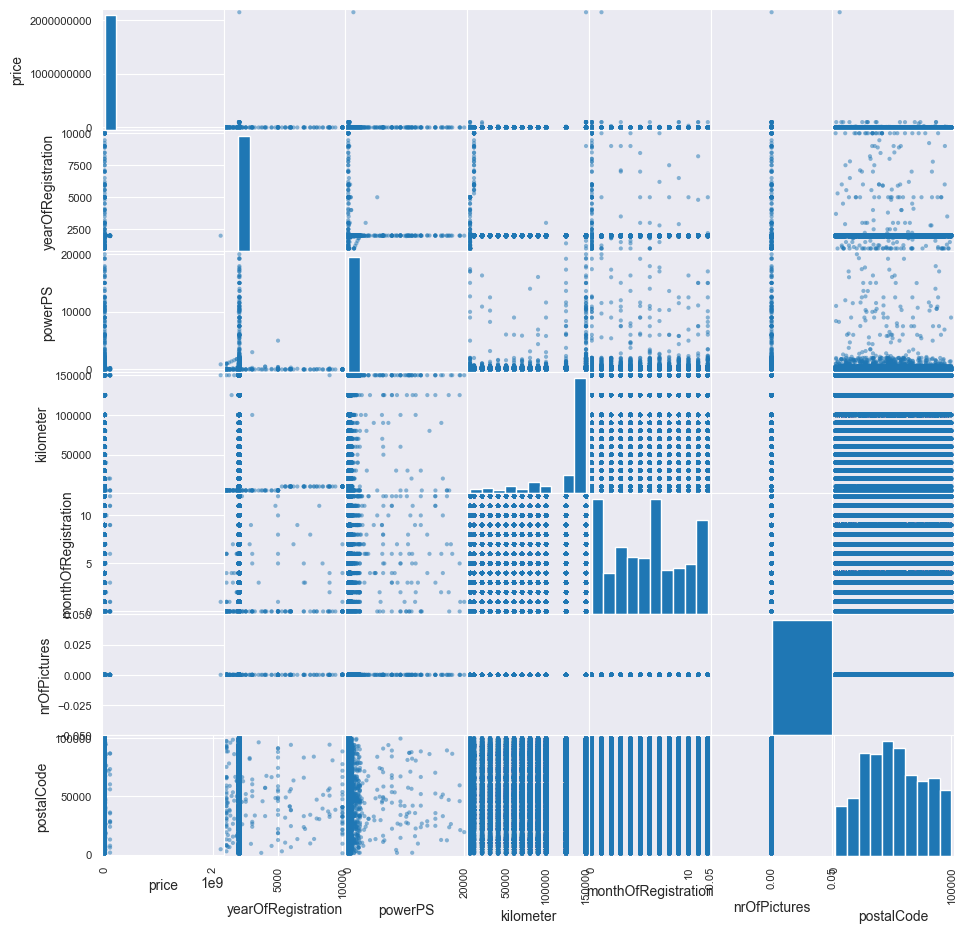

In [12]:
pd.plotting.scatter_matrix(df, figsize = (11, 11))

В общей диаграмме рассеяния уже видно, что есть какие-то выбросы:
в цене
в году регистрации

Почистим данные от выбросов, воспользуемся квантилями и IQR (интерквантильный диапазон)
уберем все, что за границами интерквантильного диапазона.

array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>,
        <AxesSubplot: xlabel='powerPS', ylabel='price'>,
        <AxesSubplot: xlabel='kilometer', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='powerPS', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='kilometer', ylabel='yearOfRegistration'>],
       [<AxesSubplot: xlabel='price', ylabel='powerPS'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='powerPS'>,
        <AxesSubplot: xlabel='powerPS', ylabel='powerPS'>,
        <AxesSubplot: xlabel='kilometer', ylabel='powerPS'>],
       [<AxesSubplot: xlabel='price', ylabel='kilometer'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='kilometer'>,
        <AxesSubplot: xlabel='powerPS', ylabel='kilometer'>,
        <AxesSubplot: xlabel

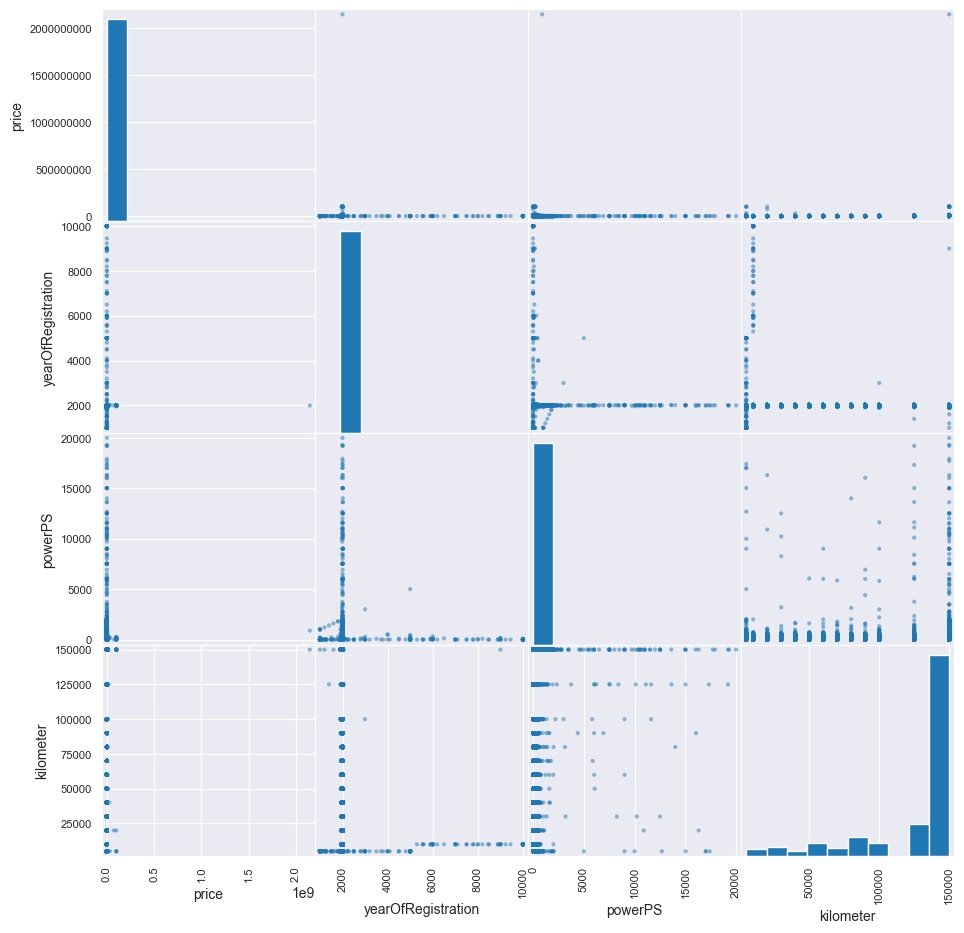

In [13]:
#исключим неиспользуемые признаки
exclude_column = ["nrOfPictures", "lastSeen", "dateCrawled", "name", "monthOfRegistration", "dateCreated", "postalCode", "seller", "offerType"]
new_df = df.drop(exclude_column, axis=1)

pd.plotting.scatter_matrix(new_df, figsize = (11, 11))

In [14]:
# функция для очистки от выбросов
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function removes outliers from a given dataframe by calculating the lower and upper bounds of the interquartile range (IQR).
    Outliers are defined as values that are less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles,
    respectively.

    Input:
    df (pd.DataFrame): A dataframe containing numeric columns

    Output:
    df (pd.DataFrame): A dataframe containing only rows that are not considered outliers
    """

    Q1 = new_df.quantile(.1, numeric_only=True) # find the Q1 value for each column with numeric data
    Q3 = new_df.quantile(.9, numeric_only=True) # find the Q3 value for each column with numeric data
    IQR = Q3 - Q1 # find the interquartile range for each column with numeric data

    # return the dataframe with rows that do not have any values lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

clean_df = remove_outliers(new_df)

C:\Users\user\AppData\Local\Temp\ipykernel_17240\2155150800.py:20: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>,
        <AxesSubplot: xlabel='powerPS', ylabel='price'>,
        <AxesSubplot: xlabel='kilometer', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='powerPS', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='kilometer', ylabel='yearOfRegistration'>],
       [<AxesSubplot: xlabel='price', ylabel='powerPS'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='powerPS'>,
        <AxesSubplot: xlabel='powerPS', ylabel='powerPS'>,
        <AxesSubplot: xlabel='kilometer', ylabel='powerPS'>],
       [<AxesSubplot: xlabel='price', ylabel='kilometer'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='kilometer'>,
        <AxesSubplot: xlabel='powerPS', ylabel='kilometer'>,
        <AxesSubplot: xlabel

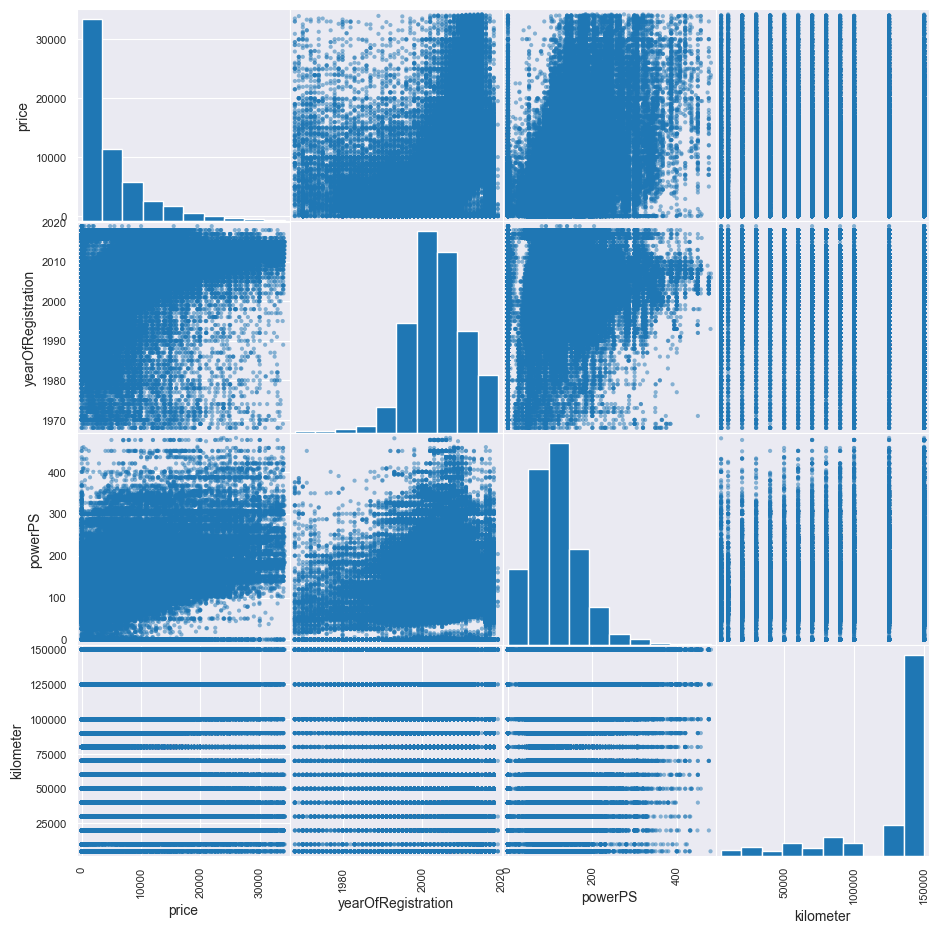

In [15]:
pd.plotting.scatter_matrix(clean_df, figsize = (11, 11))

Получаются красивые и чистые данные

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          371528 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              371528 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                371528 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

Посмотрим, сколько раз номинальные переменные принимают свои значения

In [17]:
df['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

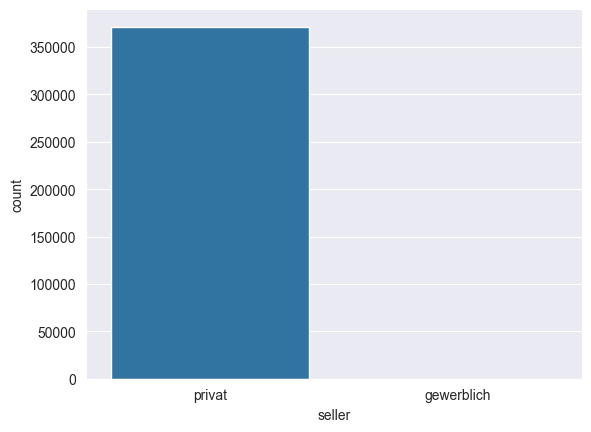

In [18]:
sns.countplot(x='seller', data=df, order=df['seller'].value_counts().index)
pass

In [19]:
df['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

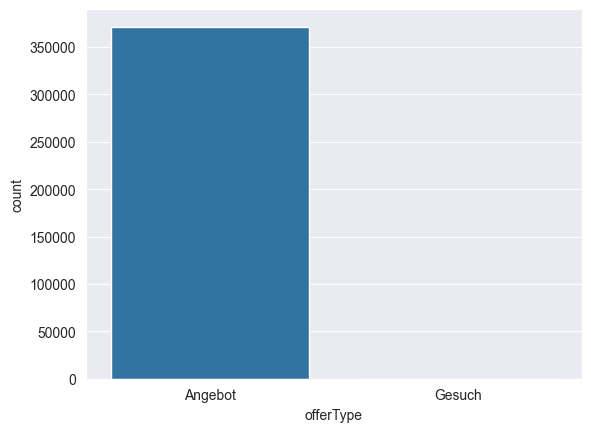

In [20]:
sns.countplot(x='offerType', data=df, order=df['offerType'].value_counts().index)
pass

In [21]:
df['vehicleType'].value_counts()

limousine     133763
kleinwagen     80023
kombi          67564
bus            30201
cabrio         22898
coupe          19015
suv            14707
andere          3357
Name: vehicleType, dtype: int64

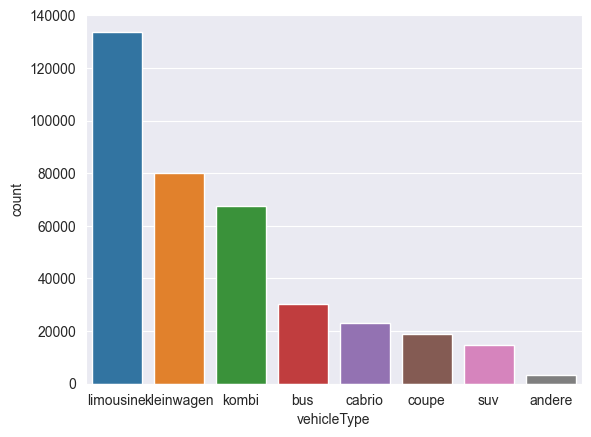

In [22]:
sns.countplot(x='vehicleType', data=df, order=df['vehicleType'].value_counts().index)
pass

In [23]:
df['gearbox'].value_counts()

manuell      294423
automatik     77105
Name: gearbox, dtype: int64

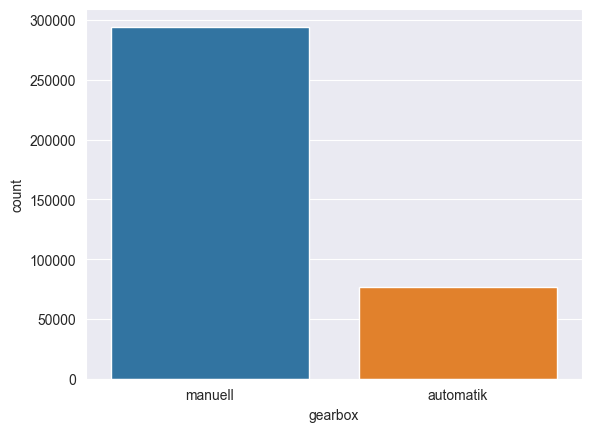

In [24]:
sns.countplot(x='gearbox', data=df, order=df['gearbox'].value_counts().index)
pass

In [25]:
df['monthOfRegistration'].value_counts()

0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: monthOfRegistration, dtype: int64

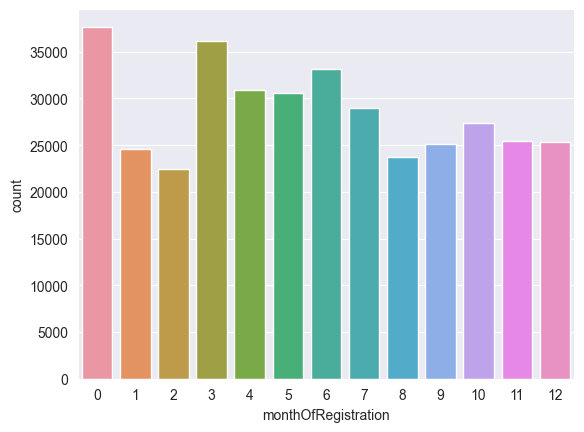

In [26]:
sns.countplot(x='monthOfRegistration', data=df)
pass

In [27]:
df['fuelType'].value_counts()

benzin     257243
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

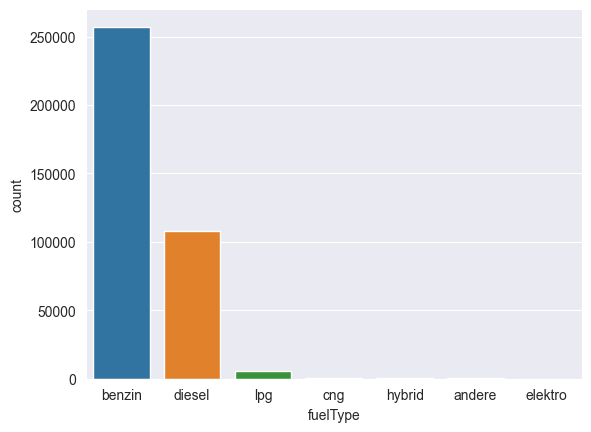

In [28]:
sns.countplot(x='fuelType', data=df, order=df['fuelType'].value_counts().index)
pass

In [29]:
df['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

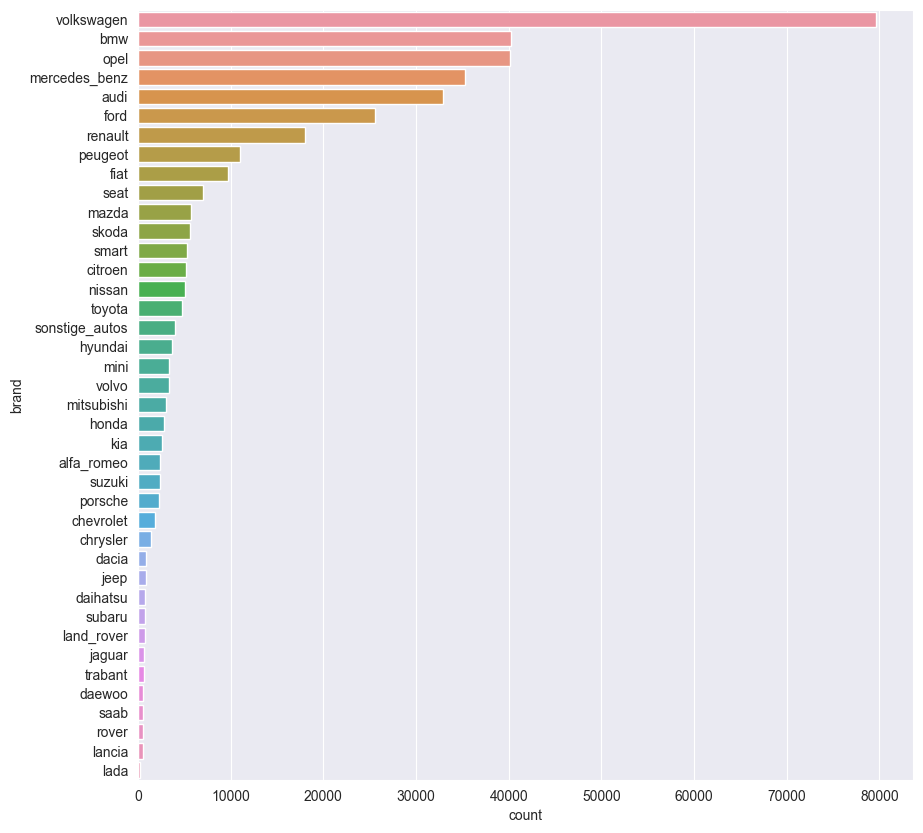

In [30]:
g=sns.countplot(data=df, y='brand', order=df['brand'].value_counts().index, width=0.8)
g.figure.set_size_inches(10,10)

Интересно на тему марок авто
датасет, судя по почтовым индексам, немецкий, но и там есть "lada" с небольшим представительством в 225 авто на продажу

In [31]:
df_lada = df.loc[df['brand'] == 'lada']
df_lada

dateCrawled                                               name  \
3240   2016-03-07 17:48:34                                    Lada_Volga_3102   
3496   2016-04-05 11:50:50  2xLada_Samara_Coupe_BJ_1991/1992_weiss/rot_199...   
4153   2016-03-31 14:55:36  seltener_Lada_Niva_mit_Saug_Diesel_Bj.1997_LKW...   
4603   2016-03-26 21:48:02        Lada_Shiguli_2101_DDR_Oldtimer_Scheunenfund   
5638   2016-03-22 01:47:20                     Lada_Niva_1700i_HU_BIS_08_2017   
...                    ...                                                ...   
366452 2016-03-05 14:17:05                                     Lada_Niva_1.7i   
367026 2016-03-26 19:53:50                    Lada_Niva_4x4__Allrad__HU_11/17   
369930 2016-03-09 22:52:37                                Lada_Niva_1.7i_Kult   
370680 2016-03-07 21:59:03  Lada_2108_Funkstreifenwagen_Miliz_keine_Volksp...   
370715 2016-03-31 19:38:55                                Lada_Priora_1_6_LPG   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
3240    privat   Angebot   8400     test   limousine                2007   
3496    privat   Angebot    199     test   limousine                1995   
4153    privat   Angebot   2500  control         suv                1997   
4603    privat   Angebot   1350  control   limousine                1980   
5638    privat   Angebot   2500     test         suv                2002   
...        ...       ...    ...      ...         ...                 ...   
366452  privat   Angebot   3666     test         suv                2008   
367026  privat   Angebot   4500  control         suv                2007   
369930  privat   Angebot   2850     test         suv                2009   
370680  privat   Angebot   2199  control   limousine                2016   
370715  privat   Angebot   2800  control       kombi                2011   

        gearbox  powerPS   model  kilometer  monthOfRegistration fuelType  \
3240    manuell      137  andere     100000                    4   benzin   
3496    manuell        0  samara     100000                    0   benzin   
4153    manuell       64    niva     150000                    2   diesel   
4603    manuell        0  andere      50000                    0   benzin   
5638    manuell        0    niva      70000                    0   benzin   
...         ...      ...     ...        ...                  ...      ...   
366452  manuell       82    niva      80000                    2   benzin   
367026  manuell       82    niva      50000                    7   benzin   
369930  manuell       82    niva      90000                    6   benzin   
370680  manuell        0  samara      70000                    0   benzin   
370715  manuell        0  andere      90000                   11      lpg   

       brand notRepairedDamage dateCreated  nrOfPictures  postalCode  \
3240    lada              nein  2016-03-07             0       88214   
3496    lada              nein  2016-04-05             0       14774   
4153    lada                ja  2016-03-31             0        1683   
4603    lada              nein  2016-03-26             0       17034   
5638    lada              nein  2016-03-21             0        9432   
...      ...               ...         ...           ...         ...   
366452  lada              nein  2016-03-04             0       35638   
367026  lada              nein  2016-03-26             0       83487   
369930  lada              nein  2016-03-09             0       73547   
370680  lada              nein  2016-03-07             0        1796   
370715  lada              nein  2016-03-31             0       12627   

                  lastSeen  
3240   2016-04-06 12:44:24  
3496   2016-04-05 11:50:50  
4153   2016-04-06 08:16:51  
4603   2016-04-06 13:16:30  
5638   2016-04-05 13:17:12  
...                    ...  
366452 2016-03-07 12:17:35  
367026 2016-04-06 10:45:34  
369930 2016-03-12 14:15:40  
370680 2016-03-08 13:16:48  
370715 2016-04-02 15

In [32]:
df_lada['model'].value_counts()

niva       129
andere      59
unknown     15
samara      13
kalina       9
Name: model, dtype: int64

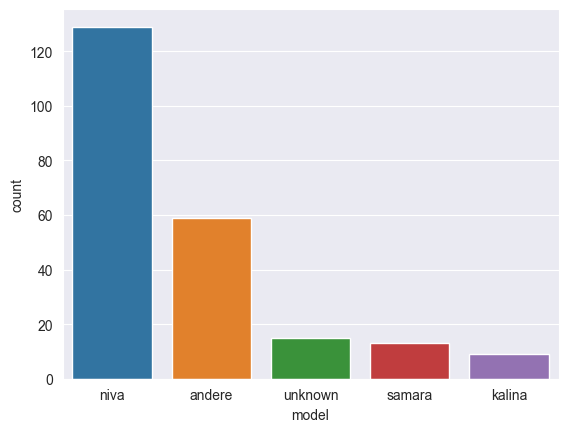

In [33]:
sns.countplot(x='model', data=df_lada, order=df_lada['model'].value_counts().index)
pass

Ниву - любят)))

In [34]:
df['notRepairedDamage'].value_counts()

nein    335242
ja       36286
Name: notRepairedDamage, dtype: int64

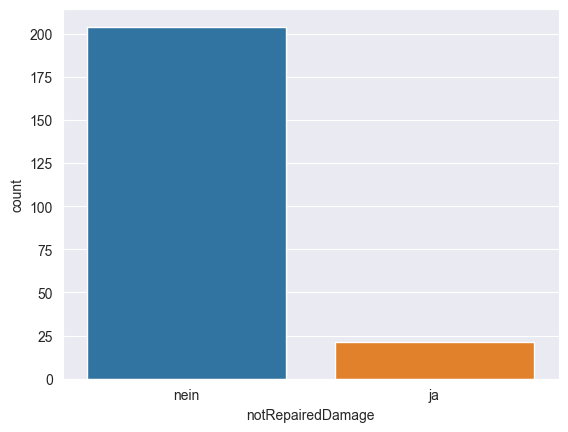

In [35]:
sns.countplot(x='notRepairedDamage', data=df_lada, order=df_lada['notRepairedDamage'].value_counts().index)
pass

In [36]:
corr_mat = clean_df.corr()
corr_mat

C:\Users\user\AppData\Local\Temp\ipykernel_17240\3699998644.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



price  yearOfRegistration   powerPS  kilometer
price               1.000000            0.412611  0.526609  -0.400107
yearOfRegistration  0.412611            1.000000  0.138034  -0.252584
powerPS             0.526609            0.138034  1.000000   0.023613
kilometer          -0.400107           -0.252584  0.023613   1.000000

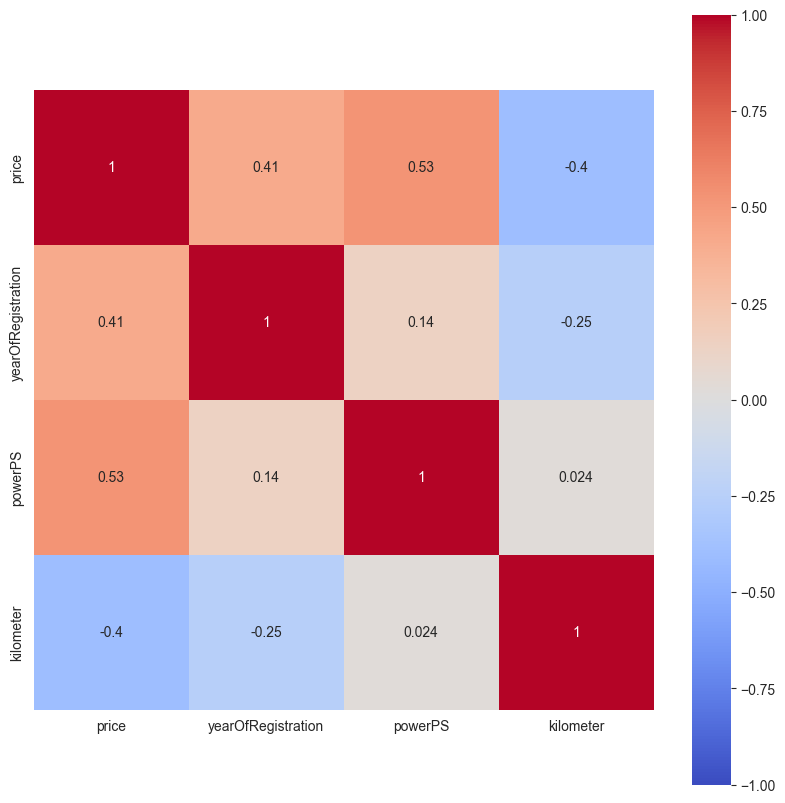

In [37]:
g=sns.heatmap(corr_mat, square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
g.figure.set_size_inches(10,10)
pass

На корреляционной матрице видно, что год регистрации и мощность двигателя значительно влияют на цену,
а вот пробег, как и следовало ожидать на цену влияет со знаком минус.

In [38]:
categorical_columns =   ["notRepairedDamage",
                        "vehicleType",
                        "abtest",
                        "gearbox",
                        "model",
                        "fuelType",
                        "brand"]

encoder = LabelEncoder()
encoded_df = clean_df.copy()
encoded_df[categorical_columns] = encoded_df[categorical_columns].apply(encoder.fit_transform)
corr = encoded_df.corr()

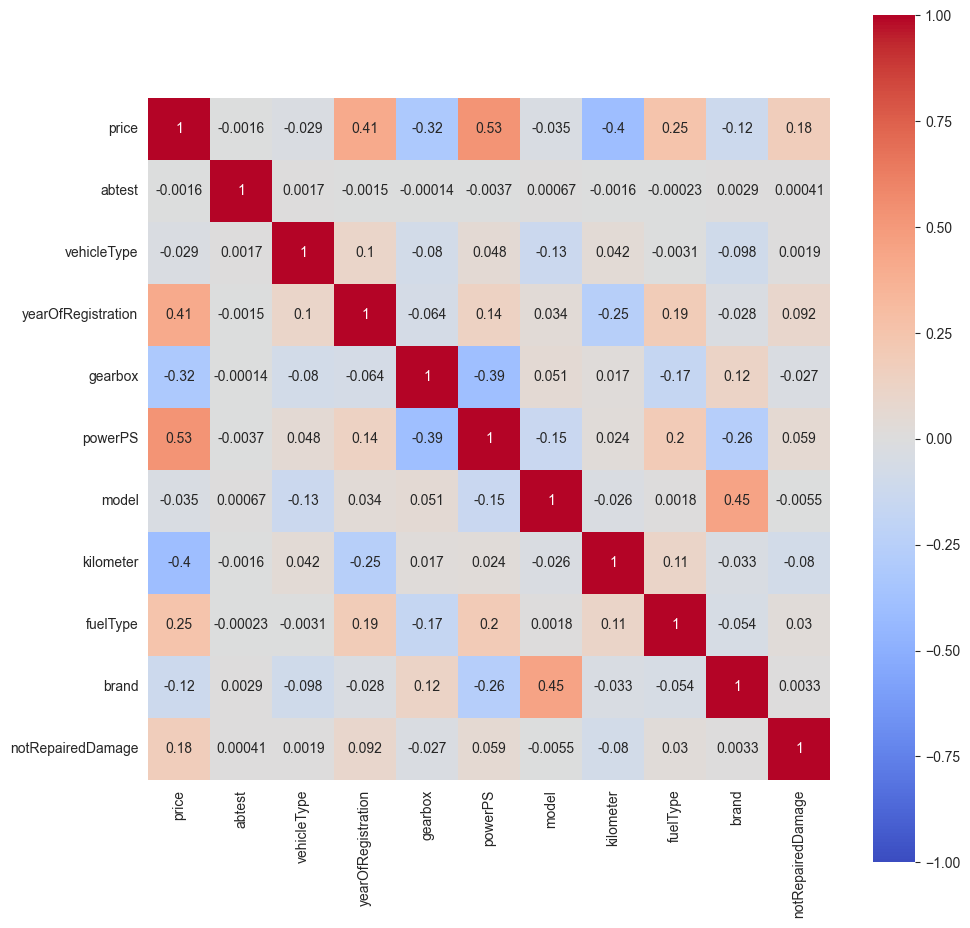

In [39]:
g=sns.heatmap(corr, square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
g.figure.set_size_inches(11,11)

В расширенном варианте с категориальными признаками мы видим, что на цену --->
коробка передач оказывает влияние
тип топлива
в меньшей степени бренд и неустраненные неисправности

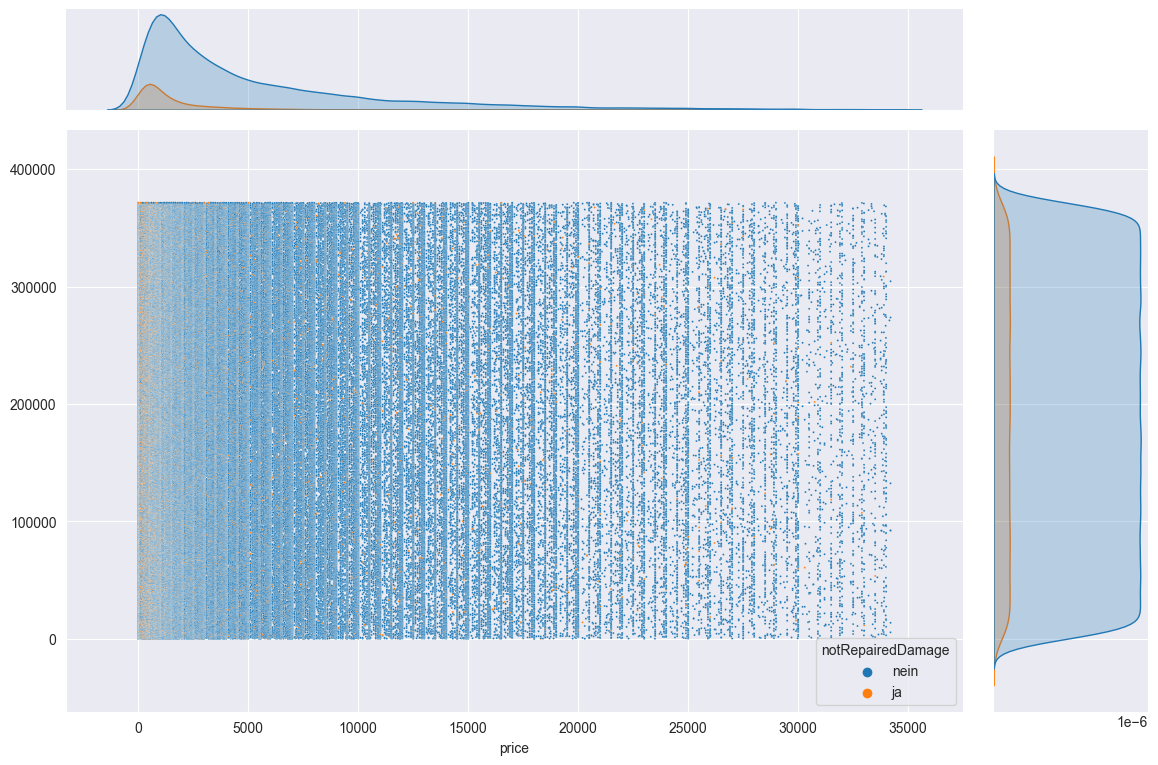

In [40]:
g=sns.jointplot(data=clean_df, x="price", y=clean_df.index, hue="notRepairedDamage", alpha=1, s=2)
g.figure.set_size_inches(12, 8)

Как и предполагается интуитивно, авто без повреждений или уже отремонтированные имеют более высокую цену

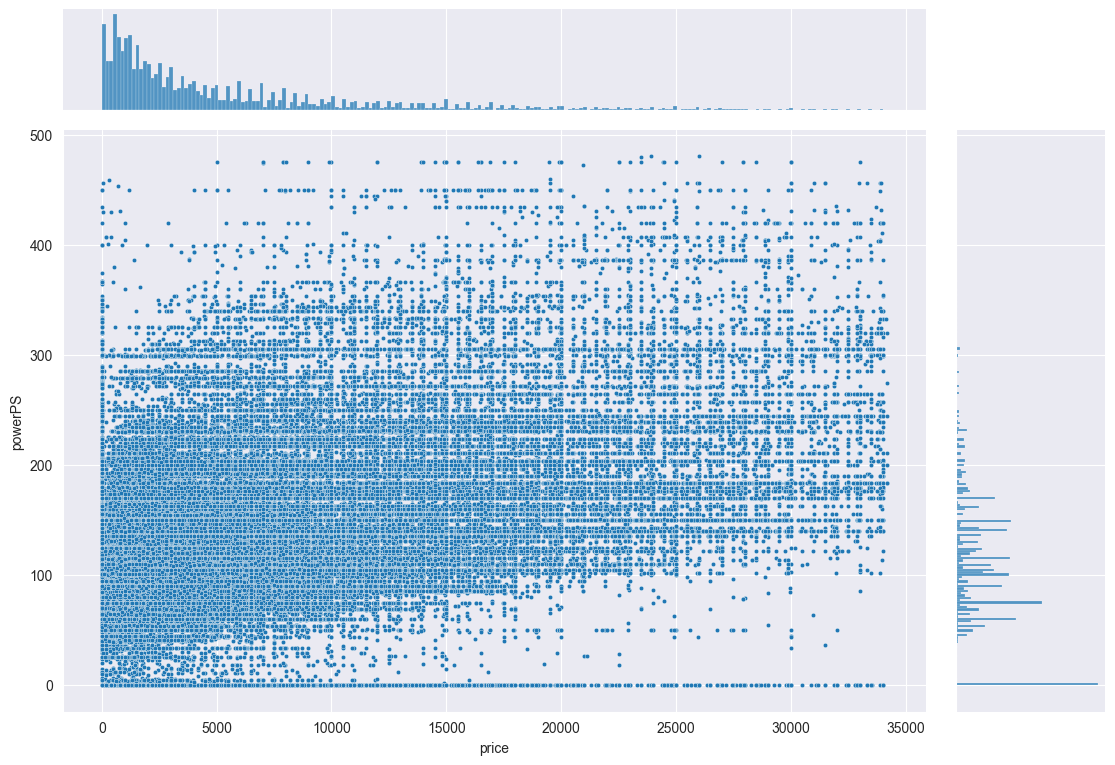

In [41]:
g=sns.jointplot(data=clean_df, x="price", y="powerPS", alpha=1, s=10)
g.figure.set_size_inches(12, 8)

Из графика видно сто существует небольшая положительная связь с тем, что более мощные автомобили стоят дороже

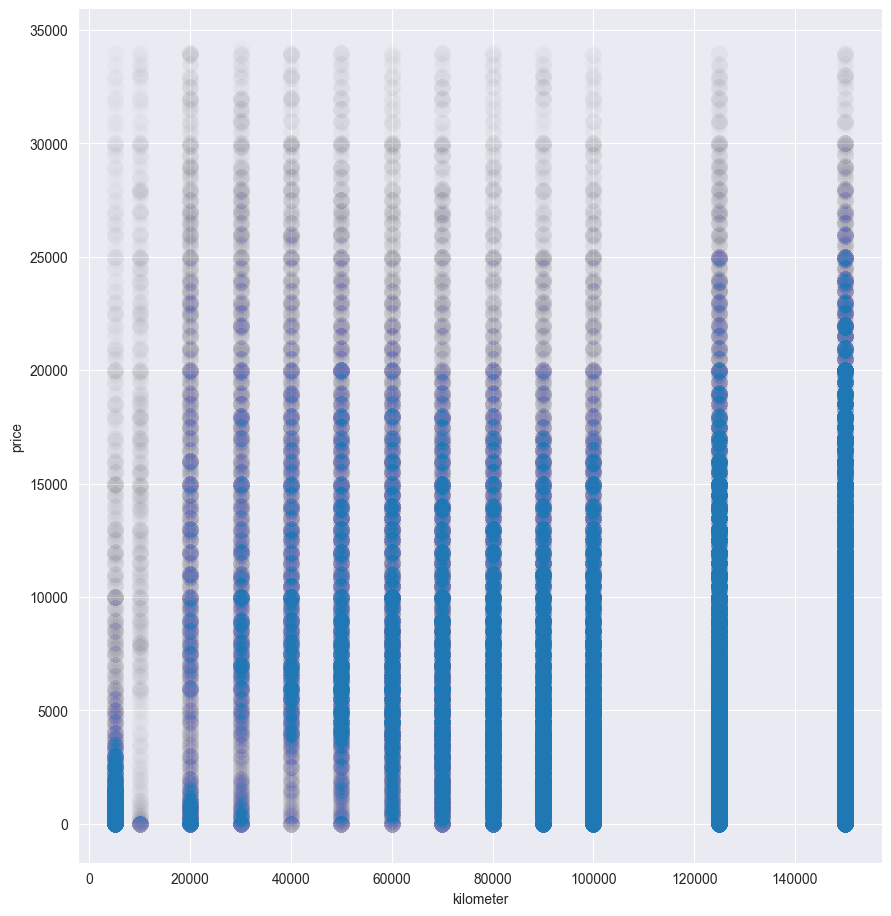

In [42]:
g=sns.relplot(data=clean_df, x="kilometer", y="price", alpha=0.002, s=150)
g.figure.set_size_inches(10, 10)

На таком графике сложно что-то сказать
Но попробуем что-то другое

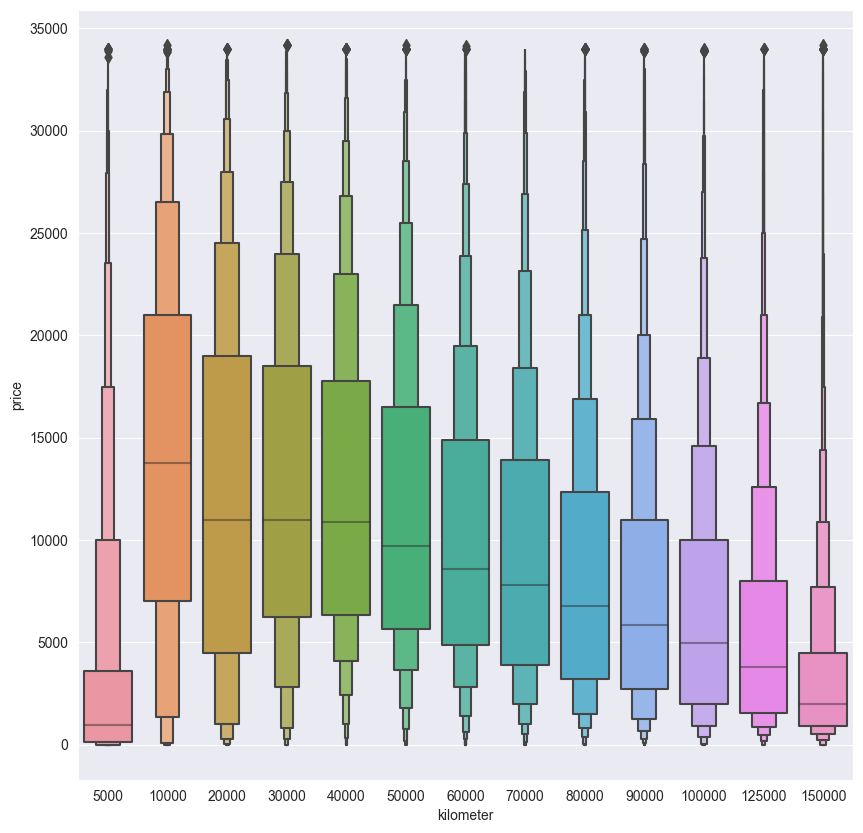

In [43]:
g=sns.boxenplot(data=clean_df, x="kilometer", y="price")
g.figure.set_size_inches(10, 10)

И тут мы уже видим, что с ростом пробега авто цена уменьшается

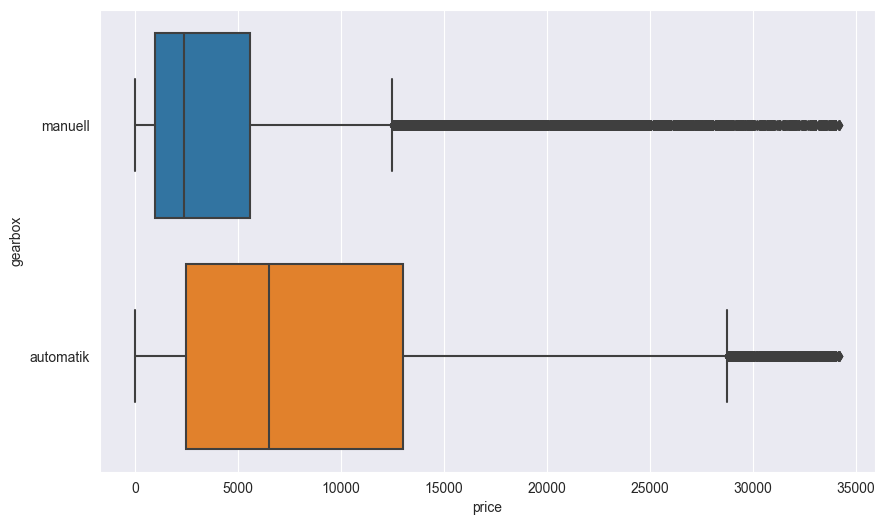

In [44]:
g=sns.boxplot(data=clean_df, x="price", y="gearbox")
g.figure.set_size_inches(10, 6)

В целом автомобили с автоматической коробкой передач стоят дороже

In [45]:
top_from_mean_price = clean_df["price"].groupby(clean_df["brand"]).agg(["sum", "count", "mean"]).sort_values(by = "mean", ascending=False)
top_from_mean_price

sum  count          mean
brand                                         
porsche          19568845   1162  16840.658348
land_rover        7963800    663  12011.764706
mini             33152164   3381   9805.431529
jeep              6850904    744   9208.204301
jaguar            4933314    562   8778.138790
audi            250138555  31982   7821.229285
bmw             294151989  39450   7456.324183
mercedes_benz   250029017  34319   7285.440048
sonstige_autos   21073061   3260   6464.129141
skoda            35707008   5622   6351.299893
chevrolet        10920132   1765   6187.043626
dacia             5253189    899   5843.369299
kia              14363297   2550   5632.665490
hyundai          19670939   3640   5404.104121
toyota           23768904   4674   5085.345315
volkswagen      391929883  78995   4961.451775
volvo            15955429   3270   4879.336086
nissan           22268707   5018   4437.765444
seat             30258857   7004   4320.225157
subaru            3137302    770   4074.418182
mazda            22247058   5683   3914.667957
suzuki            9063968   2324   3900.158348
alfa_romeo        8882348   2316   3835.210708
saab              2024622    529   3827.262760
chrysler          5397289   1434   3763.799861
honda            10631431   2828   3759.346181
citroen          18237960   5141   3547.551060
smart            18270920   5239   3487.482344
ford             86097696  25326   3399.577351
mitsubishi        9645729   3046   3166.687131
peugeot          34808111  11006   3162.648646
lada               683425    225   3037.444444
lancia            1347826    475   2837.528421
opel            113035797  39968   2828.157451
fiat             26242589   9607   2731.611221
renault          41379242  17917   2309.496121
daihatsu          1365087    806   1693.656328
trabant            852669    525   1624.131429
rover              734731    488   1505.596311
daewoo             550064    541   1016.754159

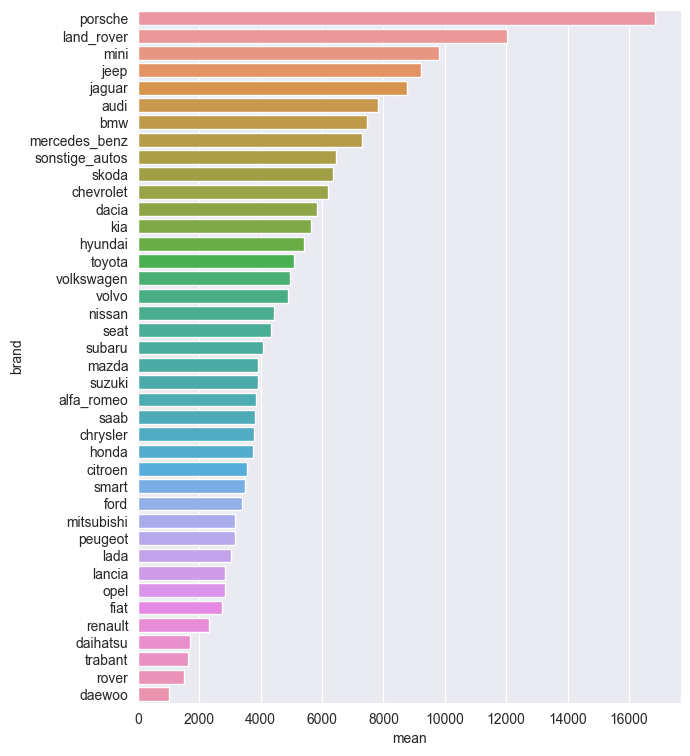

In [46]:
g=sns.barplot(y=top_from_mean_price.index, x='mean', data=top_from_mean_price)
g.figure.set_size_inches(7, 9)

График самых дорогих марок авто,
судя по всему, в 2016 году такие бренды, как porsche, land_rover, mini в среднем продавались дороже, чем иные марки

Переходим к моделированию

Данные необходимо разделить на обучающую, тестовую и валидационную выборки

In [65]:
#для начала, разделим датасет на X=Входы и y=Выходы,
X = encoded_df.drop("price", axis = 1).values
y = encoded_df["price"].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
print(f"Train Shape : {X_train.shape} --------- Test Shape : {X_test.shape}")

Train Shape : (292123, 10) --------- Test Shape : (73031, 10)


In [67]:
scores = {"r2_score" : make_scorer(r2_score), "mae" : make_scorer(mean_absolute_error), "mse" : make_scorer(mean_squared_error)}

In [68]:
model = xgb.XGBRegressor(tree_method="hist", n_estimators = 1000)
result = cross_validate(model, X_train, y_train, cv = 5, verbose = 2, scoring=scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   4.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.7s
[CV] END .................................................... total time=   3.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.0s finished


In [69]:
for key, value in result.items():
    print(f"{key} : {np.mean(value)} +- {np.std(value)}")

fit_time : 3.7024056911468506 +- 0.26348659117259343
score_time : 0.11960043907165527 +- 0.01137735726805104
test_r2_score : 0.8775093122406823 +- 0.0025329960375660384
test_mae : 1143.378259938809 +- 6.390736587707241
test_mse : 4260201.171618842 +- 97601.50972099489


In [70]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f"R2 Score : {r2_score(y_test, pred)}")

R2 Score : 0.8799510592646205
